In [1]:
from sklearn.datasets import load_iris #getting the data
iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split data 80/20 into train/test
#random_state=42 ensures the shuffle is deterministic for reproducible results

In [3]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
#random_state=42 ensures reproducible results

In [4]:
model.fit(X_train, y_train) #training the model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
y_pred = model.predict(X_test) #predict with model, then compare the first 5
print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])

Predictions: [1 0 2 1 1]
True labels: [1 0 2 1 1]


In [6]:
from sklearn.metrics import accuracy_score #show how accurate the model is
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [7]:
from sklearn.metrics import confusion_matrix #show the confusion matrix
cm = confusion_matrix(y_test, y_pred) #> pred, v true
print("Confusion Matix:\n",cm)

Confusion Matix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


This model has an accuracy of 100%.
From the confusion matix, row 1 shows that of all the setosa in test data, the model has correctly determined them all.
Similarly, row 2 and 3 show that of all versicolor and virginica in the test data, the model has correctly determined them all.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'True (below) & Predictions (right)': ['setosa','versicolor','virginica'],
    'setosa': [cm[0,0],cm[1,0],cm[2,0]],
    'versicolor': [cm[0,1],cm[1,1],cm[2,1]],
    'virginica': [cm[0,2],cm[1,2],cm[2,2]]
}

df = pd.DataFrame(data)
print(df)

  True (below) & Predictions (right)  setosa  versicolor  virginica
0                             setosa      10           0          0
1                         versicolor       0           9          0
2                          virginica       0           0         11


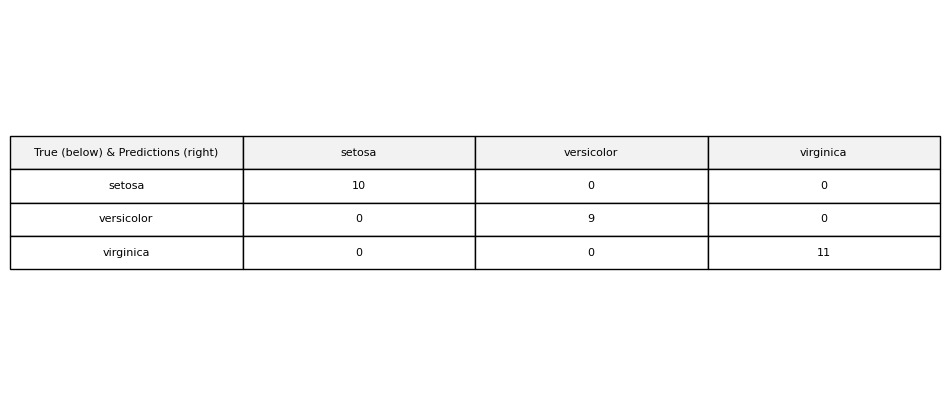

In [9]:
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Hiding axes
ax.axis('tight')
ax.axis('off')

# Creating the table and add it to the axis
table = ax.table(cellText=df.values, 
                 colLabels=df.columns, 
                 loc='center', 
                 cellLoc='center',
                 colColours=['#f2f2f2']*len(df.columns))

# Styling the table
table.auto_set_font_size(True)
table.scale(1.2, 2)  # Adjust table size (x,y)

In [11]:
import os

save_directory = "../outputs"  #file path
filename = "confusion_matrix.png" #file name

# Create outputs if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Joining the directory and filename to create the full path
full_path = os.path.join(save_directory, filename)

# Savivg the figure to the specified path
plt.savefig(full_path, 
            bbox_inches='tight',     # Triming whitespace around the table
            #dpi=300,              # Higher DPI for better quality
            transparent=False)       # Set to True if you want transparent background

plt.close() #close plot